# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [5]:
# Write the code you need for question 1 here.
import pandas as pd
import seaborn as sns


### These are not used on the 2nd question, just pandas/python.
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_json("problem_set.json")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


<Axes: xlabel='budget (millions)', ylabel='critics score (percent)'>

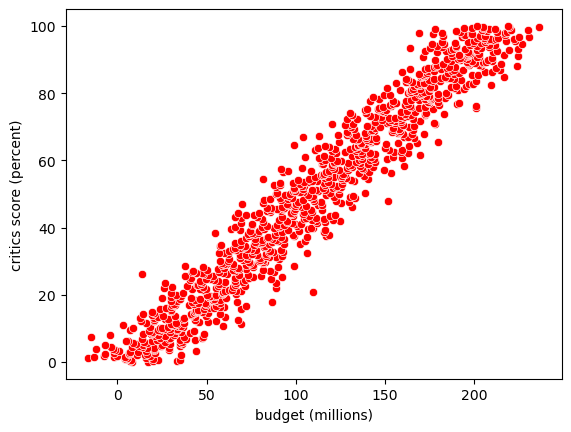

In [8]:
sns.scatterplot(data=df, x="budget (millions)", y="critics score (percent)", color="red")

In [9]:
correlation = df["budget (millions)"].corr(df["critics score (percent)"])

In [10]:
correlation

0.9697766428756551

In [11]:
pearsonr(df["budget (millions)"], df["critics score (percent)"])

PearsonRResult(statistic=0.9697766428756552, pvalue=0.0)

In [12]:
#budget = df["budget (millions)"]

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

### The relationship between budget and the critic score is positive, very strong as well as linear. We calculated the pearson correlation score and it was a 0.96, very close to a 1, which means that there is a strong correlation between both factors.

In [14]:
# Write the code you need for question 2 here.

In [15]:
### The function is the same one that was made last class on our own, but with shorter variables.

def bestLoF(data, x, y):
    x_mean = df[x].mean()
    y_mean = df[y].mean()
    
    num = ((df[x] - x_mean) * (df[y] - y_mean)).sum()
    
    deno = ((df[x] - x_mean) ** 2).sum()
    
    slope = num / deno
    intercept = y_mean - slope * x_mean
    
    return f"y = {slope:.2f}x + {intercept:.2f}"

In [16]:
bestLoF(df, "budget (millions)", "critics score (percent)")

'y = 0.47x + -1.40'

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

### The equation for the best line of fit for budget and the critic score is "y = 0.47x + -1.40". 

In [123]:
# Write the code you need for question 3 here.


### This function is literally the same one from above, but instead, it calculates the R Squared and RMSE to see the accuracy.
### This also contains a lot of "help" of AI..., such as changes in variable names, for example, df is now data.

def blofAccuracy(data, x, y):
    
    x_mean = df[x].mean()
    y_mean = df[y].mean()

    num = ((data[x] - x_mean) * (data[y] - y_mean)).sum()
    deno = ((data[x] - x_mean) ** 2).sum()

    slope = num / deno
    intercept = y_mean - slope * x_mean

    data['y_pred'] = slope * data[x] + intercept

    ss_total = ((data[y] - y_mean) ** 2).sum()  
    ss_res = ((data[y] - df['y_pred']) ** 2).sum() 
    r2 = 1 - (ss_res / ss_total)

   # rmse = ((data[y] - data['y_pred']) ** 2).mean() ** 0.5
    return {
        'equation': f"y = {slope:.2f}x + {intercept:.2f}",
        'R^2': r2,
       # 'RMSE': rmse       -will not be using this(as if right now)
    }



In [125]:
blofAccuracy(df, "budget (millions)", "critics score (percent)")

{'equation': 'y = 0.47x + -1.40', 'R^2': 0.940466737067176}

In [20]:
math = 0.47*10 + -1.40

In [21]:
math

3.2999999999999994

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

### If a movie had a budget of 10 million dollars, the critic score would be a 3.2 %. It is quite accurate, since by calculating the square root for the best line of fit, it is a 0.9, which in a scale of 0-1, it is almost one, indicating that it the line is very accurate. So, there is a high chance of getting a prediction correct between budget of a movie and the critic score it gets.

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<Axes: xlabel='length (minutes)', ylabel='critics score (percent)'>

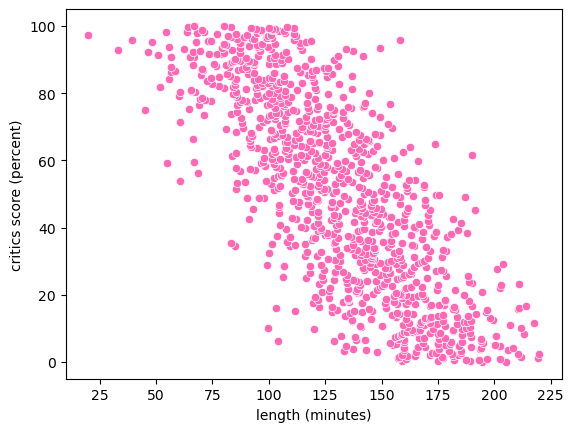

In [24]:
# Write the code you need for question 1 here.

sns.scatterplot(data=df, x="length (minutes)", y="critics score (percent)", color="hotpink")

In [25]:
pearsonr(df["length (minutes)"], df["critics score (percent)"])

PearsonRResult(statistic=-0.7649508928065848, pvalue=7.015359801619232e-193)

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

### The relationship between the length of a movie and the critics score is a negative, somewhat firm and barely linear.  The correlation coefficient is 0.74, barely on the baseline if whether the relation is strong or weak. With pearson r, the pvalue is 6.7, which is greater than 5, meaning that we can come to a conclusion that there really is no "correlation".

In [27]:
# Write the code you need for question 2 here. 
# If you generalized your function in Problem 1, 
# please just copy and paste your function definition and call below.

### The function is the same one that was made last class on our own, but with shorter variables.

def bestLoF(data, x, y):
    x_mean = df[x].mean()
    y_mean = df[y].mean()
    
    
    num = ((df[x] - x_mean) * (df[y] - y_mean)).sum()
    
    deno = ((df[x] - x_mean) ** 2).sum()
    
    slope = num / deno
    intercept = y_mean - slope * x_mean
    
    return f"y = {slope:.2f}x + {intercept:.2f}"

bestLoF(df, "length (minutes)", "critics score (percent)")

'y = -0.63x + 132.67'

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

### The equation for the best line of fit for the length of a movie and the critics score is "y = -0.61x + 129.51"

In [29]:
# Write the code you need for question 3 here.

mathTwo = -0.61 * 150 + 129.51

mathTwo

38.00999999999999

In [130]:
blofAccuracy(df, "length (minutes)", "critics score (percent)")

{'equation': 'y = -0.63x + 132.67', 'R^2': 0.5851498684055911}

In [128]:
#df[(df["length (minutes)"] >= 145) & (df["length (minutes)"] <=150)] This is an example for future reasons, ahahaha!

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

### The critic score that a movie would recieve if it were 150 mintues, according to the BLoF equation,  would be a 38.01%. It is not that accurate, sicnce by calculating the square root for the BLoF, it gets a 0.585, which is halfway through being a complete 1, meaning that the BLoF that there really isn't a relationship between the length of a movei and the critic score it recieves.

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

PearsonRResult(statistic=0.035462236713153836, pvalue=0.2625585910072716)

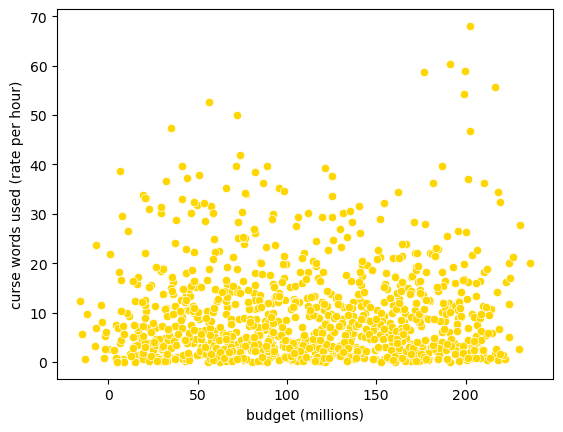

In [34]:
# Write the code you need for question 1 here.
sns.scatterplot(data=df, x="budget (millions)", y="curse words used (rate per hour)", color= "gold")
pearsonr(df["budget (millions)"], df["curse words used (rate per hour)"])

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***
### The relationship between the budget and the amount of curse words per hour is very very weak, it is positive, but it is not linear. In short, there is no relationship, since also that the correlation coefficient is 0.03, very weak.

In [36]:
# Write the code you need for question 2 here.
# If you generalized your function in Problem 1 or Problem 2, 
# please just copy and paste your function definition and call below.
def bestLoF(data, x, y):
    x_mean = df[x].mean()
    y_mean = df[y].mean()
    
    
    num = ((df[x] - x_mean) * (df[y] - y_mean)).sum()
    
    deno = ((df[x] - x_mean) ** 2).sum()
    
    slope = num / deno
    intercept = y_mean - slope * x_mean
    
    return f"y = {slope:.2f}x + {intercept:.2f}"

bestLoF(df, "budget (millions)", "curse words used (rate per hour)")

'y = 0.01x + 9.24'

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***
### The equation for the best line of fit for the budget and the amount of curse words per hour is "y = 0.01x + 9.24". 

In [140]:
# Write the code you need for question 3 here.

mathThree =  0.01 * 5 + 9.24

In [142]:
mathThree

9.290000000000001

In [144]:
blofAccuracy(df, "budget (millions)", "curse words used (rate per hour)")

{'equation': 'y = 0.01x + 9.24', 'R^2': 0.0012575702327000116}

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***
### This prediction is not accurate at all, first of all, the scatter plot is not event linear, second, the score it got for the squared root for the BLof is a 0.001, meaning that there is no connection between the budget and the amount of curse word, so a prediction wouldn't even work. Also, the pearson correlation is a 0.03, which is a very low score as well. Not accurate.

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***